In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [56]:
df = pd.read_csv('amazon_reviews.csv')
df.head()

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17340 entries, 0 to 17339
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sentiments             17340 non-null  object 
 1   cleaned_review         17337 non-null  object 
 2   cleaned_review_length  17340 non-null  int64  
 3   review_score           17340 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 542.0+ KB


In [58]:
df = df.dropna(subset=['cleaned_review'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17337 entries, 0 to 17339
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sentiments             17337 non-null  object 
 1   cleaned_review         17337 non-null  object 
 2   cleaned_review_length  17337 non-null  int64  
 3   review_score           17337 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 677.2+ KB


In [60]:
df['cleaned_review'].duplicated().sum()

4144

In [61]:
print(df.duplicated().sum())

1347


In [62]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15990 entries, 0 to 17339
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sentiments             15990 non-null  object 
 1   cleaned_review         15990 non-null  object 
 2   cleaned_review_length  15990 non-null  int64  
 3   review_score           15990 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 624.6+ KB


In [63]:
df['cleaned_review'].duplicated().sum()

2797

In [64]:
df[['cleaned_review', 'sentiments']].duplicated().sum()

2797

In [65]:
df = df.drop_duplicates(subset=['cleaned_review', 'sentiments'])

In [66]:
df['cleaned_review'].duplicated().sum()

0

# Try lemmetizer and stemmazirer

# Stop word removing --> not a good idea as it erase things like not, hasn't, wouldn't, ... (which is useful for detecting negative reviews)

In [67]:
df.groupby('sentiments')['review_score'].mean()

sentiments
negative    3.467873
neutral     3.581365
positive    3.910702
Name: review_score, dtype: float64

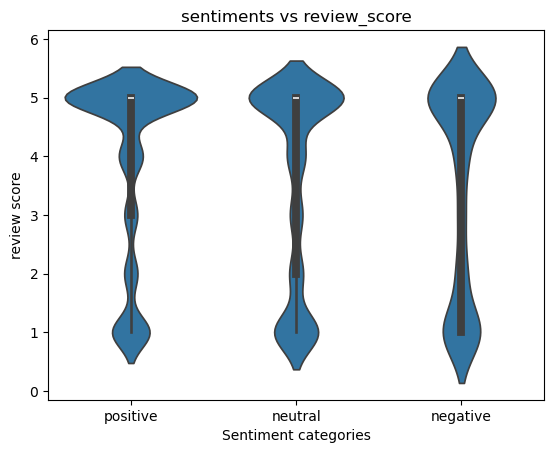

In [68]:
#Plotting phase
sns.violinplot( x=df["sentiments"], y=df["review_score"])
plt.title('sentiments vs review_score')
plt.xlabel('Sentiment categories')
plt.ylabel('review score')
plt.show()

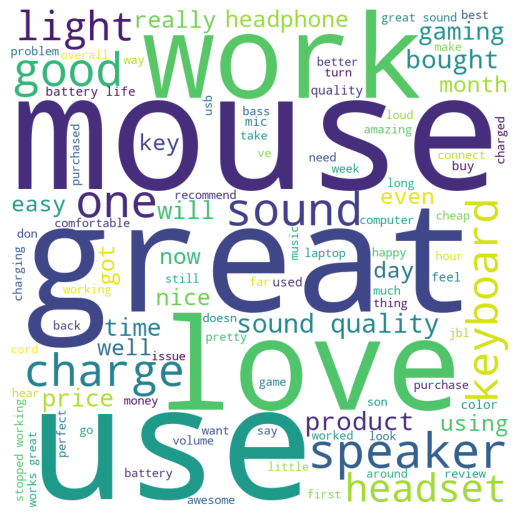

In [69]:
# Word Clouds
from wordcloud import WordCloud

# create a word cloud for positive reviews
positive_reviews = df[df['review_score'] == 5]['cleaned_review'].str.cat(sep=' ')
positive_cloud = WordCloud(width=800, height=800, max_words=100, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(positive_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

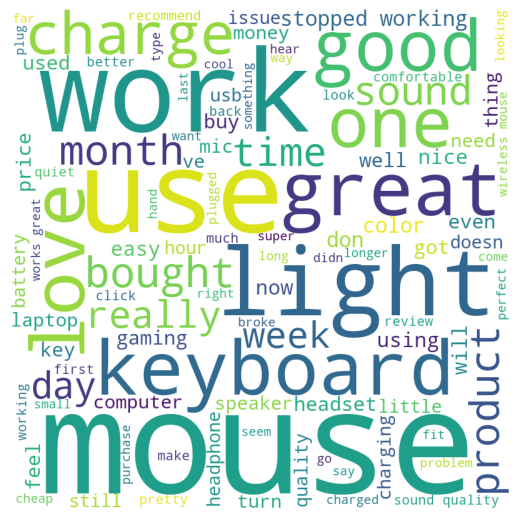

In [70]:
# create a word cloud for negative reviews
negative_reviews = df[df['review_score'] == 1]['cleaned_review'].str.cat(sep=' ')
negative_cloud = WordCloud(width=800, height=800, max_words=100, background_color='white').generate(negative_reviews)

plt.figure(figsize=(6, 5), facecolor=None)
plt.imshow(negative_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

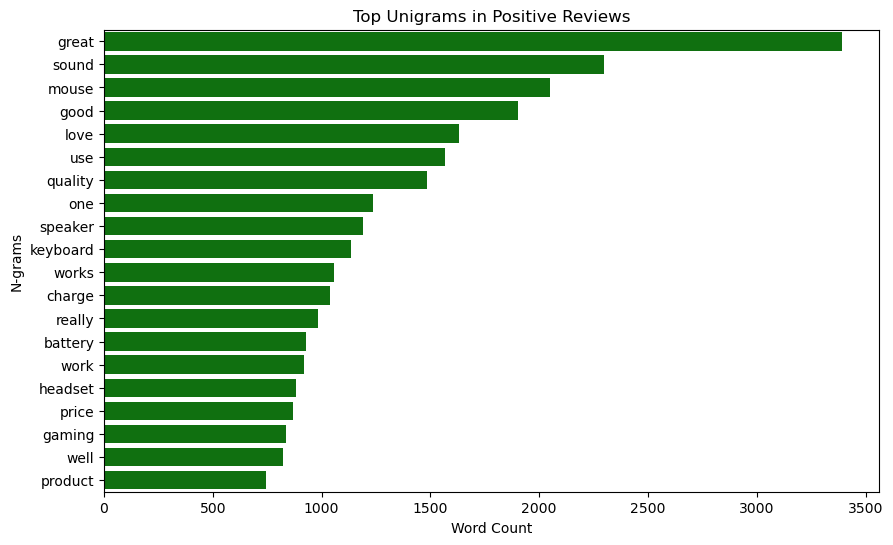

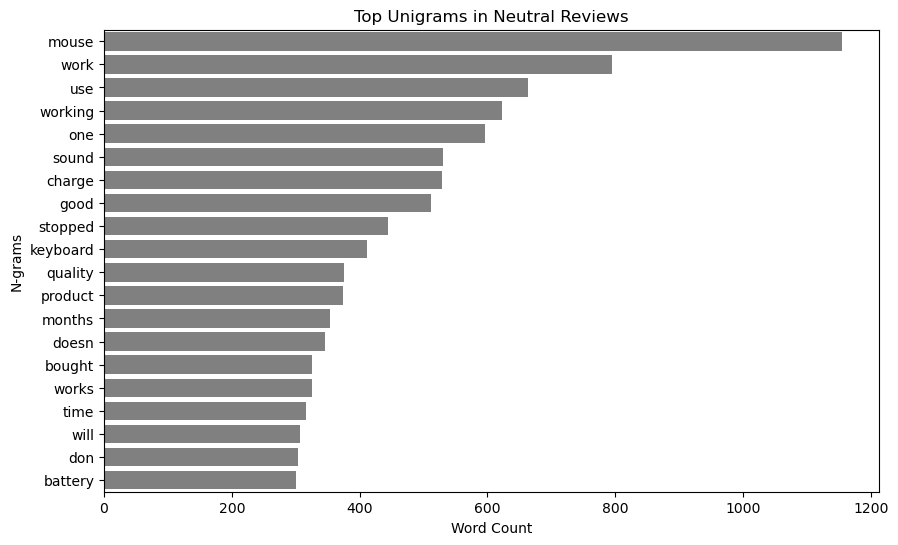

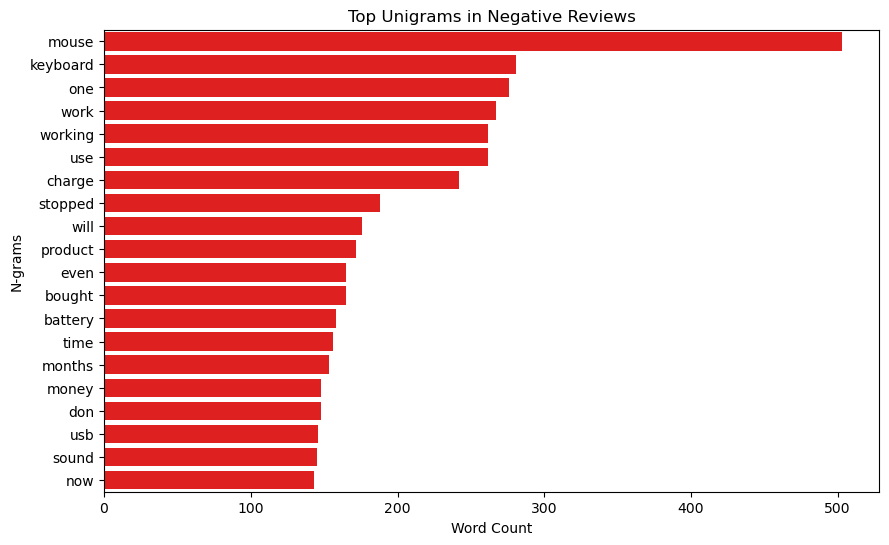

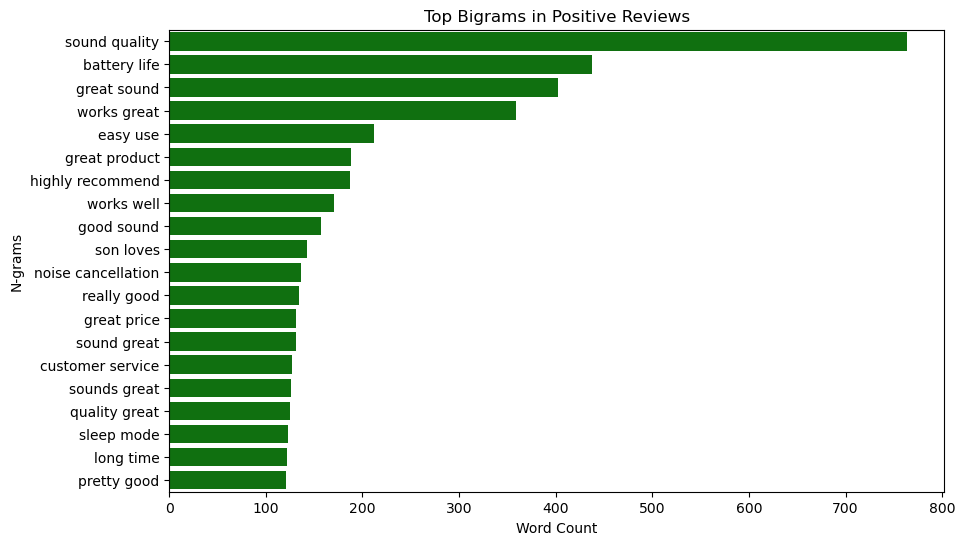

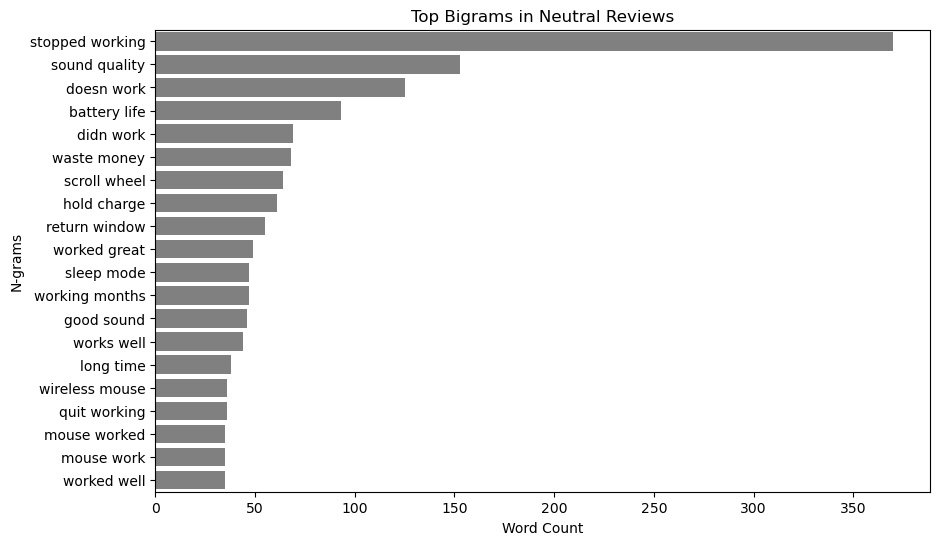

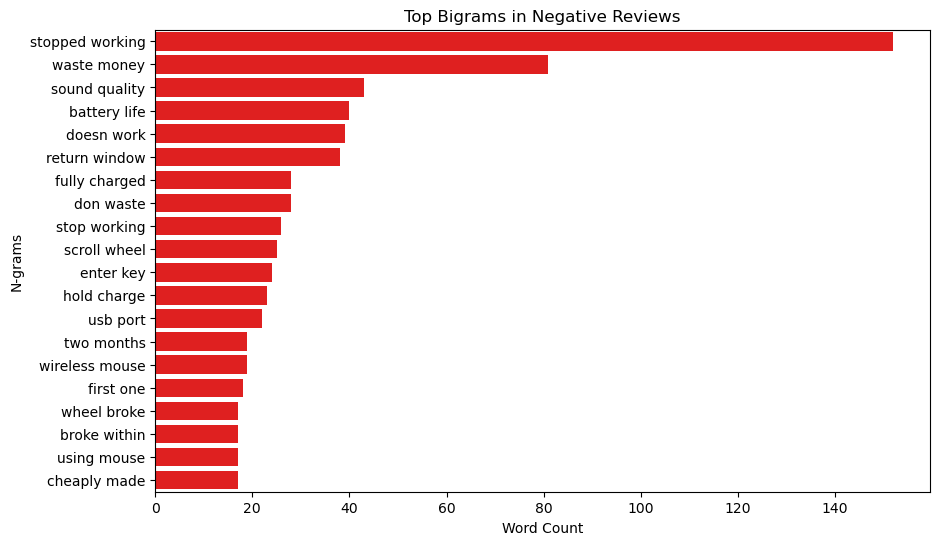

In [ ]:
# Code taken from https://github.com/BenRoshan100/Sentiment-analysis-Amazon-reviews/blob/master/sentiment-analysis-amazon-reviews.ipynb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from wordcloud import STOPWORDS

# -------------------------------
# Step 1: Filter the reviews by sentiment
# -------------------------------
review_pos = df[df["sentiments"].str.lower() == 'positive'].dropna(subset=["cleaned_review"])
review_neu = df[df["sentiments"].str.lower() == 'neutral'].dropna(subset=["cleaned_review"])
review_neg = df[df["sentiments"].str.lower() == 'negative'].dropna(subset=["cleaned_review"])

# -------------------------------
# Step 2: Function to generate n-grams
# -------------------------------
def generate_ngrams(text, n_gram=1):
    tokens = [word for word in text.lower().split() if word and word not in STOPWORDS]
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# -------------------------------
# Step 3: Function to get top n-gram trace
# -------------------------------
def get_top_ngram_trace(reviews, n, head, color):
    freq_dict = defaultdict(int)
    for sent in reviews["cleaned_review"]:
        for ngram in generate_ngrams(sent, n_gram=n):
            freq_dict[ngram] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))
    fd_sorted.columns = ["word", "wordcount"]
    return fd_sorted.head(head)

# -------------------------------
# Step 4: Plotting top n-grams for each sentiment
# -------------------------------
def plot_ngram_bars(data, title, color):
    plt.figure(figsize=(10, 6))
    sns.barplot(x="wordcount", y="word", data=data, color=color)
    plt.title(title)
    plt.xlabel('Word Count')
    plt.ylabel('N-grams')
    plt.show()

# -------------------------------
# Step 5: Get top n-grams for each sentiment
# -------------------------------
top_pos_unigrams = get_top_ngram_trace(review_pos, n=1, head=20, color='green')
top_neu_unigrams = get_top_ngram_trace(review_neu, n=1, head=20, color='grey')
top_neg_unigrams = get_top_ngram_trace(review_neg, n=1, head=20, color='red')


top_pos_bigrams = get_top_ngram_trace(review_pos, n=2, head=20, color='green')
top_neu_bigrams = get_top_ngram_trace(review_neu, n=2, head=20, color='grey')
top_neg_bigrams = get_top_ngram_trace(review_neg, n=2, head=20, color='red')

# -------------------------------
# Step 6: Plot each sentiment's n-grams
# -------------------------------

# Unigrams
plot_ngram_bars(top_pos_unigrams, "Top Unigrams in Positive Reviews", 'green')
plot_ngram_bars(top_neu_unigrams, "Top Unigrams in Neutral Reviews", 'grey')
plot_ngram_bars(top_neg_unigrams, "Top Unigrams in Negative Reviews", 'red')

# Bigrams
plot_ngram_bars(top_pos_bigrams, "Top Bigrams in Positive Reviews", 'green')
plot_ngram_bars(top_neu_bigrams, "Top Bigrams in Neutral Reviews", 'grey')
plot_ngram_bars(top_neg_bigrams, "Top Bigrams in Negative Reviews", 'red')


# Inspect if the label is balanced or not

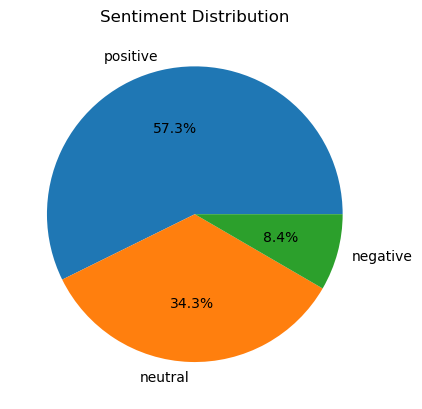

In [105]:
df['sentiments'].value_counts()

plt.pie(df['sentiments'].value_counts(), labels=['positive', 'neutral', 'negative'], autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

# Pre-processing

*Note: redundant to use CountVectorizer() (BOW) before TfidfVectorizer() as TfidfVectorizer() already does that when it computes term frequency 

In [140]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

# Download required NLTK resources
nltk.download("punkt")

# Prepare features and target
X = df["cleaned_review"]
y = df["sentiments"]

# Label Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into train+val (80%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Split train+val into train (75%) and val (25%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

# Custom stemmer function with error handling
stemmer = PorterStemmer()


def stem_tokenizer(text):
    try:
        tokens = word_tokenize(text)
        return [stemmer.stem(token) for token in tokens]
    except:
        return []  # Return empty list for problematic texts


# Create pipeline with SMOTE
pipeline = ImbPipeline(
    [
        (
            "tfidf",
            TfidfVectorizer(
                tokenizer=stem_tokenizer,
                lowercase=True,
                max_features=5000,  # You can adjust this
                token_pattern=None,  # Explicitly disable default token pattern
            ),
        ),
        ("smote", SMOTE(random_state=42)),
        (
            "classifier",
            LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
        ),
    ]
)

# Define parameter grid for random search
param_dist = {
    'tfidf__max_features': [1000, 5000, 10000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'smote__k_neighbors': [3, 5, 7],
    'classifier__C': loguniform(1e-3, 100),  # Log-uniform distribution for C
    'classifier__solver': ['lbfgs', 'liblinear', 'sag']
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter combinations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=3
)

# Perform random search on training data
print("Starting randomized grid search...")
random_search.fit(X_train, y_train)

# Best model from random search
best_model = random_search.best_estimator_

# Train the model
# pipeline.fit(X_train, y_train)

# Evaluate on validation set
val_preds = best_model.predict(X_val)
print("Validation Report:")
# print(classification_report(y_val, val_preds, target_names=le.classes_))

print(accuracy_score(val_preds, y_val))

# # Final evaluation on test set
test_preds = best_model.predict(X_test)
print("\nTest Report:")
print(accuracy_score(test_preds, y_test))
# print(classification_report(y_test, test_preds, target_names=le.classes_))

# # To get label mapping
# print("\nLabel mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

[nltk_data] Downloading package punkt to C:\Users\tamqu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Starting randomized grid search...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Validation Report:
0.799545282303903

Test Report:
0.7912087912087912
